In [10]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr
from datetime import datetime
from datetime import timedelta
import matplotlib.cm as cm

In [11]:
path = Path.cwd()

In [12]:
def calc_NSE(Qo, Qm):
    QoAv  = np.mean(Qo)
    ErrUp = np.sum((Qo - Qm)**2)
    ErrDo = np.sum((Qo - QoAv)**2)
    return 1 - (ErrUp / ErrDo)
    
def calc_log_NSE(Qo, Qm):
    Qo[Qo == 0] = 1e-6
    QoAv  = np.mean(Qo)
    ErrUp = np.sum((np.log(Qo) - np.log(Qm))**2)
    ErrDo = np.sum((np.log(Qo) - np.log(QoAv))**2)
    return 1 - (ErrUp / ErrDo)

In [126]:
files = list((path / "Output").glob("*.nc"))

In [127]:
# for file in files:
#     ds = xr.open_dataset(file)
#     NSE = np.zeros(ds.attrs['n_particles'])
#     log_NSE = np.zeros(ds.attrs['n_particles'])
#     for i in range(ds.attrs['n_particles']):
#         NSE[i] = calc_NSE(ds["Q_obs"].values, ds["Q"].isel(EnsembleMember=i).values)
#         log_NSE[i] = calc_log_NSE(ds["Q_obs"].values, ds["Q"].isel(EnsembleMember=i).values)

#     i_max_nse = NSE.argmax()
#     i_max_log_nse = log_NSE.argmax()

#     ds = ds.isel(EnsembleMember=[i_max_nse, i_max_log_nse])
#     dict_nse = dict(NSE_max=NSE.max(),
#                     log_NSE_max=log_NSE.max(),
#                     i_NSE_max=i_max_nse,
#                     i_log_NSE_max=i_max_log_nse)
#     ds.attrs.update(dict_nse)
#     ds.to_netcdf(file.parent / (file.name.replace(" ", "_")))

In [128]:
files

[PosixPath('/media/davidhaasnoot/files/work/Studie TUD/Msc/Year 6/Q3 Thesis/Code/run_callibration/Output/01333000_N-5_2024-05-28 11_45.nc'),
 PosixPath('/media/davidhaasnoot/files/work/Studie TUD/Msc/Year 6/Q3 Thesis/Code/run_callibration/Output/01333000_N-5_2024-05-28 11_48.nc'),
 PosixPath('/media/davidhaasnoot/files/work/Studie TUD/Msc/Year 6/Q3 Thesis/Code/run_callibration/Output/01350000_N-5_2024-05-28 11_45.nc'),
 PosixPath('/media/davidhaasnoot/files/work/Studie TUD/Msc/Year 6/Q3 Thesis/Code/run_callibration/Output/01350000_N-5_2024-05-28 11_48.nc')]

In [133]:
file = files[3]
ds = xr.open_dataset(file)

In [134]:
ds

<xarray.Dataset> Size: 656B
Dimensions:         (time: 9)
Coordinates:
    EnsembleMember  int64 8B ...
  * time            (time) datetime64[ns] 72B 1997-08-01 ... 1997-08-09
Data variables: (12/16)
    Si              (time) float64 72B ...
    Su              (time) float64 72B ...
    Sf              (time) float64 72B ...
    Ss              (time) float64 72B ...
    Sp              (time) float64 72B ...
    Q               (time) float64 72B ...
    ...              ...
    Pmax            float64 8B ...
    Tlag            float64 8B ...
    Kf              float64 8B ...
    Ks              float64 8B ...
    FM              float64 8B ...
    Q_obs           (time) float64 72B ...
Attributes:
    title:          HBV storage & parameter terms data over time for 5 particles
    history:        Storage term results from ewatercycle_HBV.model
    n_particles:    5
    HRU_id:         01350000
    NSE_max:        -10.110162445756313
    log_NSE_max:    -10.439666660374009
    i_NSE_max:      0
    i_log_NSE_max:  0

In [135]:
ds["Q"].values

array([0.02469063, 0.049443  , 0.04955425, 0.04964154, 0.06948997,
       0.09721904, 0.10281227, 0.09835302, 0.09425926])

KeyError: "no index found for coordinate 'EnsembleMember'"

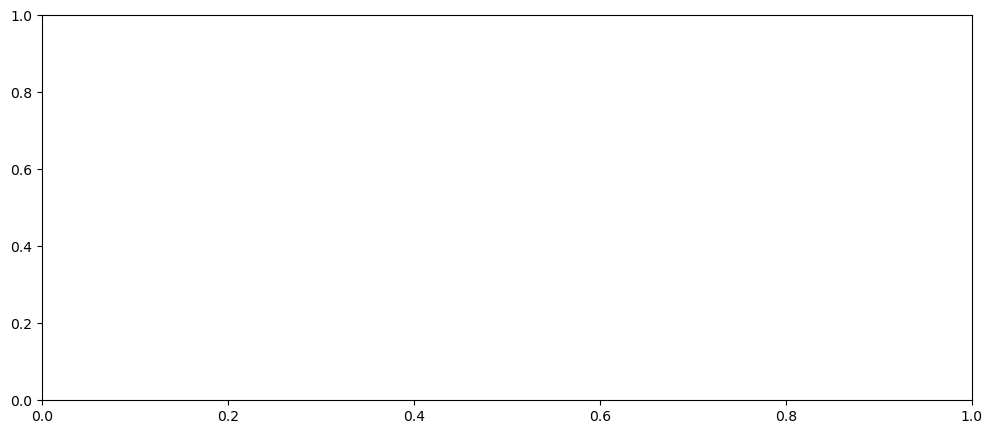

In [136]:
fig, ax = plt.subplots(1,1,figsize=(12,5))
ax.plot(ds["Q"].time.values, ds["Q"].sel(EnsembleMember=ds.attrs['i_NSE_max']).values,color="C1", zorder=10,label='NSE')    
ax.plot(ds["Q"].time.values, ds["Q"].sel(EnsembleMember=ds.attrs['i_log_NSE_max']).values,color="C0")
ds["Q_obs"].plot(ax=ax,color='k',lw=0,marker='.')